<a href="https://colab.research.google.com/github/aizatbite/CDS503-KNN/blob/main/KNN_Lab_2_College.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **KNN**

# Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cp = pd.read_csv('/content/drive/MyDrive/college_plans.csv')
cp.head()

,StudentID,Gender,ParentIncome,IQ,ParentEncouragement,CollegePlans
0,60,Male,31770,90,Encouraged,Does not plan to attend
1,61,Male,79310,110,Encouraged,Plans to attend
2,62,Female,36600,109,Not Encouraged,Does not plan to attend
3,63,Female,66770,114,Encouraged,Plans to attend
4,64,Male,59400,103,Encouraged,Plans to attend


In [ ]:
#rename the attributes
cp.columns = ['id','sex','parinc','iq','parenc','plan']
cp.columns
cp

,id,sex,parinc,iq,parenc,plan
0,60,Male,31770,90,Encouraged,Does not plan to attend
1,61,Male,79310,110,Encouraged,Plans to attend
2,62,Female,36600,109,Not Encouraged,Does not plan to attend
3,63,Female,66770,114,Encouraged,Plans to attend
4,64,Male,59400,103,Encouraged,Plans to attend
...,...,...,...,...,...,...
16378,7379,Male,48620,100,Encouraged,Plans to attend
16379,7380,Male,79530,103,Encouraged,Plans to attend
16380,7381,Male,6900,68,Not Encouraged,Does not plan to attend
16381,7382,Female,41400,108,Encouraged,Does not plan to attend


In [ ]:
#dropping identity attributes
#axis = 1 equal to drop a column
cp = cp.drop('id', axis = 1)
cp.head()

,sex,parinc,iq,parenc,plan
0,Male,31770,90,Encouraged,Does not plan to attend
1,Male,79310,110,Encouraged,Plans to attend
2,Female,36600,109,Not Encouraged,Does not plan to attend
3,Female,66770,114,Encouraged,Plans to attend
4,Male,59400,103,Encouraged,Plans to attend


In [ ]:
#untuk tengok null values
cp.isna().sum()

id        0
sex       0
parinc    0
iq        0
parenc    0
plan      0
dtype: int64

In [ ]:
cp.dtypes

sex       object
parinc     int64
iq         int64
parenc    object
plan      object
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


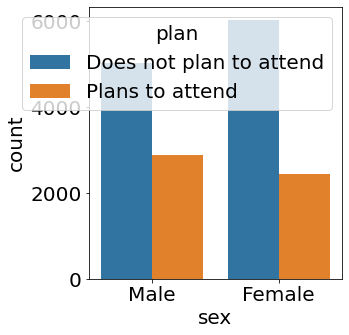

In [ ]:
#size of graph (width,height)
plt.figure(figsize = (10,5))

#plt.subplot(number of row, number of column, plot number)
plt.subplot(1,2,1)

#sns.countplot('selected features', hue = 'target column @ class label', data = variable simpan dataframe)
sns.countplot('sex', hue = 'plan', data = cp)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


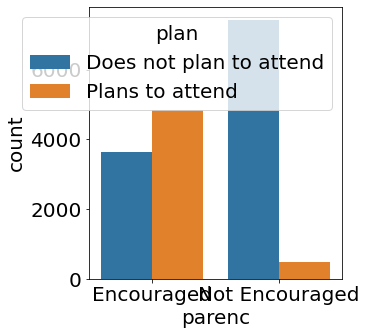

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,2)
sns.countplot('parenc', hue = 'plan', data = cp)

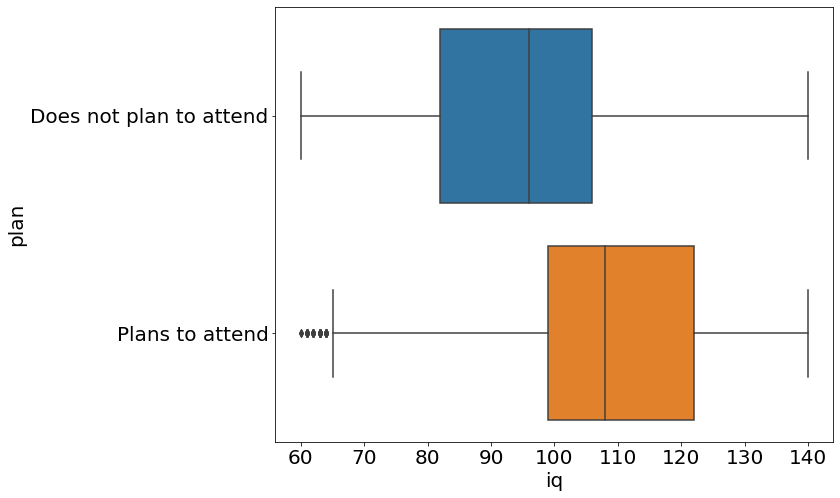

In [ ]:
#tengok detail pasal boxplot kat starred webpage
ax = sns.boxplot(x="iq", y="plan", data=cp)

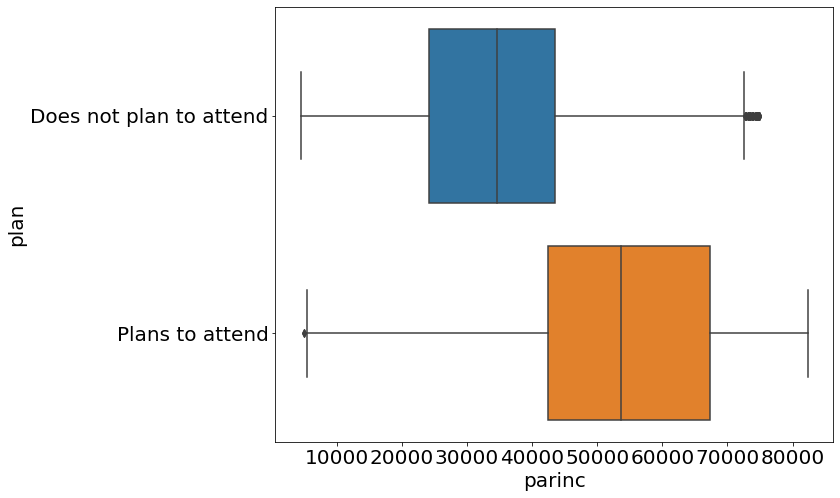

In [ ]:
#tengok detail pasal boxplot kat starred webpage
ax = sns.boxplot(x="parinc", y="plan", data=cp)

In [ ]:
#convert integer to string : plan (class label)
cp['plan'] = cp['plan'].astype(str)
cp['plan'].describe()

count                       16383
unique                          2
top       Does not plan to attend
freq                        11058
Name: plan, dtype: object

In [ ]:
cp['plan'].value_counts()

Does not plan to attend    11058
Plans to attend             5325
Name: plan, dtype: int64

The class distribution greatly imbalanced with more instances on does not plan to attend (11058) than plan to attend (5325)

In [ ]:
#convert integer to string : parinc
cp['parinc'] = cp['parinc'].astype(str)

#convert integer to string :iq
cp['iq'] = cp['iq'].astype(str)

cp.dtypes

sex       object
parinc    object
iq        object
parenc    object
plan      object
dtype: object

Changing categorical columns in numerical form by using label encoding, so ML algo could read it


*   sex
*   parenc
*   plan





In [ ]:
#import LabelEncoder
from sklearn import preprocessing

#create LabelEncoder
le = preprocessing.LabelEncoder()

#convert string categories into numbers for sex, parenc,plan
cp['sex'] = le.fit_transform(cp['sex'])
cp['parenc'] = le.fit_transform(cp['parenc'])
cp['plan'] = le.fit_transform(cp['plan'])

cp.head()



,sex,parinc,iq,parenc,plan
0,1,31770,90,0,0
1,1,79310,110,0,1
2,0,36600,109,1,0
3,0,66770,114,0,1
4,1,59400,103,0,1


# Train & Validate KNN Classifier

In [ ]:
#indicating target and features
target = cp['plan']
features = cp.drop('plan', axis = 1)

Splittin dataset into training, development & test

In [ ]:
#import train_test_split
#hold uut method
from sklearn.model_selection import train_test_split

#split the dataset into training + dev and test
x, x_test, y, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

#split the dataset into training & development set
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [ ]:
#training KNN model

#import k nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

#create classifier with k = 1, 0 = not attend while 1 = attend
#‘n_neighbors‘ are the number of neighbors that will vote for the class of the target point; default number is 5.

knn = KNeighborsClassifier(n_neighbors = 1)

#train model using training set
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
#predict the target for the development dataset
dev_predict = knn.predict(x_dev)

dev_predict

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
#evaluate the knn model on development set

#import scikit learn metrics module for accuracy calculation
from sklearn import metrics

#compute the model accuracy on the development set : How often is this classifier correct?
print("Accuracy : ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy :  0.933257055682685


Accuracy of classifier is 93%

# Tune Parameters

**using for loop to identify the best value of k**

In [ ]:
# Initialize 2 empty lists (K and validation) to store the values of k and validation score
# Initialize 1 empty dictionary (scores) to store the k:validation_score (key:value) pairs
K = [] 
validation = []
scores = {}

# The for loop will test k values from 1 to 29
for k in range(1, 30): 
 clf = KNeighborsClassifier(n_neighbors = k) 
 clf.fit(x_train, y_train) 
 
 # Can also use the score() function to compute accuracy
 # Compute accuracy by applying the model on the development set
 #clf means classification or classifier?????
 validation_score = clf.score(x_dev, y_dev)
 
 # Adds a single item (k value) to the list
 K.append(k) 
 
 validation.append(validation_score) 
 
 # A dictionary holds key:value pairs
 # Store the validation score for each value of k (k is the key)
 scores[k] = [validation_score] 
# Print the key:value pairs in scores
for keys, values in scores.items(): 
 print(keys, ':', values)

1 : [0.933257055682685]
2 : [0.898932112890923]
3 : [0.8653699466056446]
4 : [0.8665141113653699]
5 : [0.8607932875667429]
6 : [0.8440122044241037]
7 : [0.8356216628527842]
8 : [0.8211289092295957]
9 : [0.8142639206712433]
10 : [0.8012967200610221]
11 : [0.8012967200610221]
12 : [0.7902364607170099]
13 : [0.7883295194508009]
14 : [0.7902364607170099]
15 : [0.7879481311975591]
16 : [0.7765064836003052]
17 : [0.7761250953470633]
18 : [0.7738367658276125]
19 : [0.7681159420289855]
20 : [0.7677345537757437]
21 : [0.7677345537757437]
22 : [0.7650648360030511]
23 : [0.7700228832951945]
24 : [0.7669717772692601]
25 : [0.7589626239511823]
26 : [0.7570556826849733]
27 : [0.7543859649122807]
28 : [0.7566742944317315]
29 : [0.7509534706331045]


The best value for k is 1 as it has the highest accuracy. Higher value of K does not lead to better performance

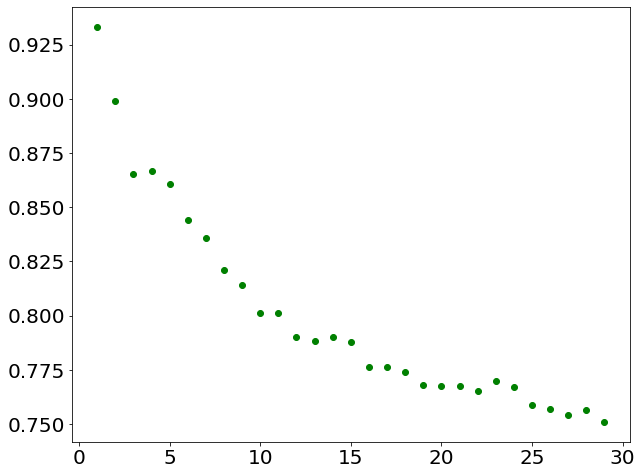

In [ ]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})
plt.scatter(K, validation, color ='g') 
plt.show() 

Above tuning we used default distance which is p = 2 (euclidean) and we found that the optimum value for k @ n_neighbors = 1, increasing value of k doesnt change the accuracy

## Default

In [ ]:
#Default Parameter
knn = KNeighborsClassifier()

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development set
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.8283752860411899


## Manhattan (p=1) , weight = distance

In [ ]:
# Create a KNN classifier with k = 28 and manhattan_distance (p = 1)
knn = KNeighborsClassifier(n_neighbors = 30, weights = 'distance', algorithm = 'ball_tree', p = 1)

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development set
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.9252479023646072


In [ ]:
# Create a KNN classifier with k = 28 and manhattan_distance (p = 1)
knn = KNeighborsClassifier(n_neighbors = 30, weights = 'distance', algorithm = 'kd_tree', p = 1)

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development set
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.9252479023646072


In [ ]:
# Create a KNN classifier with k = 28 and manhattan_distance (p = 1)
knn = KNeighborsClassifier(n_neighbors = 30, weights = 'distance', algorithm = 'brute', p = 1)

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development set
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.9252479023646072


In [ ]:
# Create a KNN classifier with k = 28 and manhattan_distance (p = 1)
knn = KNeighborsClassifier(n_neighbors = 30, weights = 'distance', algorithm = 'auto', p = 1)

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development set
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.9252479023646072


## Euclidean = (p=2), weight = uniform

In [ ]:
# Create a KNN classifier with k = 28 and manhattan_distance (p = 1)
knn = KNeighborsClassifier(n_neighbors = 30, weights = 'uniform', algorithm = 'ball_tree', p = 2)

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development set
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.7540045766590389


In [ ]:
# Create a KNN classifier with k = 28 and manhattan_distance (p = 1)
knn = KNeighborsClassifier(n_neighbors = 30, weights = 'uniform', algorithm = 'kd_tree', p = 2)

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development set
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.7540045766590389


In [ ]:
# Create a KNN classifier with k = 28 and manhattan_distance (p = 1)
knn = KNeighborsClassifier(n_neighbors = 30, weights = 'uniform', algorithm = 'brute', p = 2)

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development set
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.7540045766590389


In [ ]:
# Create a KNN classifier with k = 28 and manhattan_distance (p = 1)
knn = KNeighborsClassifier(n_neighbors = 30, weights = 'uniform', algorithm = 'auto', p = 2)

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development set
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.7540045766590389


Changing from manhattan to minkowski (arbitrary) doesnt have much changes

# Test Model for Generalization Error

In [ ]:
# Create a KNN classifier with k = 28
knn = KNeighborsClassifier(n_neighbors = 50)

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development dataset
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Dev): ", metrics.accuracy_score(y_dev, dev_predict))


Accuracy (Dev):  0.7623951182303585


In [ ]:
# Predict the target for the test dataset
test_predict = knn.predict(x_test)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

Accuracy (Test):  0.7787610619469026


The difference between the validation accuracy and test accuracy is not huge so we can conclude that our KNN
classifier does not suffer from overfitting and generalizes well on new data.


# Standardize Features

In [ ]:
features.head()

,sex,parinc,iq,parenc
0,1,31770,90,0
1,1,79310,110,0
2,0,36600,109,1
3,0,66770,114,0
4,1,59400,103,0


In [ ]:
from sklearn import preprocessing
names = features.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit the data on the Scaler object
scaled_features = scaler.fit_transform(features)

# After standardization, scaled_features is transformed into an array so we need to convert
scaled_features = pd.DataFrame(scaled_features, columns = names)

scaled_features.head()

,sex,parinc,iq,parenc
0,1.034850,-0.487648,-0.506549,-0.966915
1,1.034850,2.138339,0.548982,-0.966915
2,-0.966324,-0.220852,0.496205,1.034218
3,-0.966324,1.445661,0.760088,-0.966915
4,1.034850,1.038562,0.179546,-0.966915


Since the values of the features have changed, we can repeat the steps above to split the data, train and
evaluate the KNN classifier.


In [ ]:
# Split data into train, validation and test sets

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split the dataset into training + development set and test set
x, x_test, y, y_test = train_test_split(scaled_features, target, test_size = 0.2, random_state = 0)

# Split the dataset into training set and development set
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [ ]:
# Create a KNN classifier with k = 50
knn = KNeighborsClassifier(n_neighbors = 30, weights = 'distance', algorithm = 'ball_tree')

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development dataset
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Dev): ", metrics.accuracy_score(y_dev, dev_predict))


Accuracy (Dev):  0.9145690312738368


In [ ]:
# Predict the target for the test dataset
test_predict = knn.predict(x_test)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

Accuracy (Test):  0.9237107110161733


With feature standardization, accuracy on the test set improved to 92%.
